In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.optimize import minimize , basinhopping
from scipy.stats import poisson

In [23]:
header = ['trade_id','price','quantity','order_id','timestamp','is_buyer_maker']
df = pd.read_csv('./BTCUSDT-trades-2023-05-31.csv',header=0 , names = header)
df.head()

# header = ['trade_id','price','quantity','order_id','timestamp','is_buyer_maker']
# header = ['number','price','quantity','start trade','end trade','timestamp','s','is_buyer_maker']
# df = pd.read_csv('./BTCTUSD-aggTrades-2023-06-27.csv',header=0 , names = header)
# df.head()

,trade_id,price,quantity,order_id,timestamp,is_buyer_maker
0,3765419375,27680.0,0.400,11072.0000,1685491200110,True
1,3765419376,27680.0,0.006,166.0800,1685491200156,True
2,3765419377,27680.0,0.300,8304.0000,1685491200157,True
3,3765419378,27680.1,0.003,83.0403,1685491200244,False
4,3765419379,27680.1,0.003,83.0403,1685491203809,False


In [61]:
def closed_time_series(df, time_interval,tick_size):
    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
    df = df.set_index('timestamp')
    df['quantity'] = df['quantity'] * df['price']
    df['buy_quantity'] = np.where(df['is_buyer_maker'], df['quantity'], 0)
    df['sell_quantity'] = np.where(df['is_buyer_maker'], 0, df['quantity'])
    df = df.resample(str(time_interval)+'S').agg({'price':'last', 'quantity':'sum', 'buy_quantity':'sum', 'sell_quantity':'sum'})
    df['return'] = df['price'].diff() / tick_size
    df = df.dropna()
    df['volatility'] = df['return'].rolling(600).std()
    return df

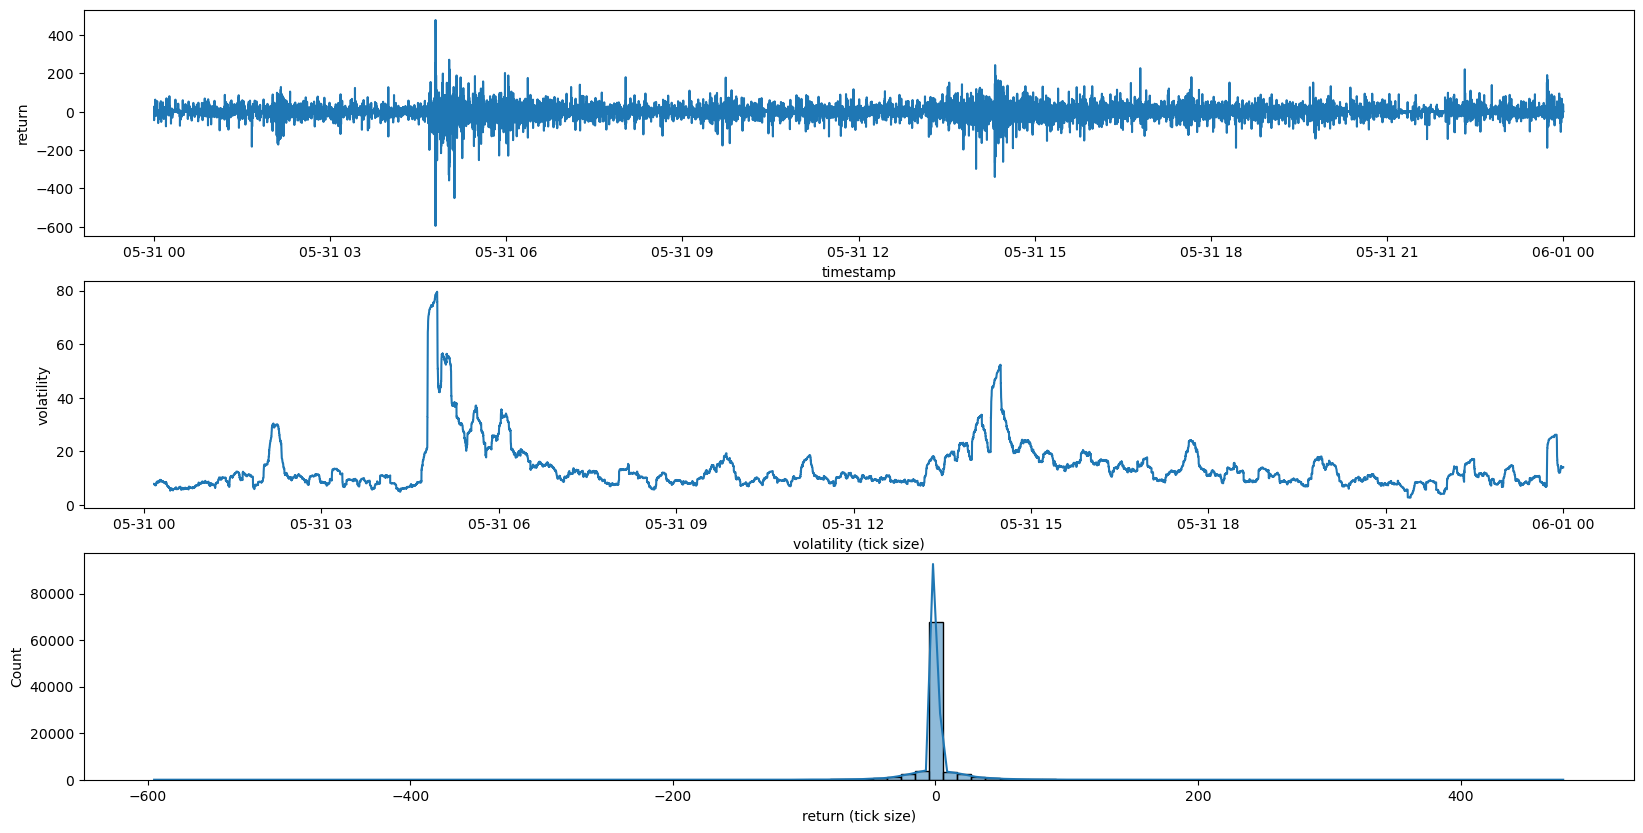

In [62]:
df_2 = closed_time_series(df, 1,0.1)
fig, axs = plt.subplots(3, 1, figsize=(20, 10))
sns.lineplot(data=df_2, x=df_2.index, y='return', ax=axs[0])
sns.lineplot(data=df_2, x=df_2.index, y='volatility', ax=axs[1])
sns.histplot(data=df_2, x='return', bins=100, ax=axs[2], kde=True)
axs[0].set_ylabel('return')
axs[1].set_xlabel('volatility (tick size)')
axs[2].set_xlabel('return (tick size)')
plt.show()